# Pytorch
Pytorch is a Python-based scientific computing package targeted at two sets of audiences:
- A replacement for NumPy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

## Getting Started
### Tensors
Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.


In [8]:
import torch
import numpy as np

In [2]:
# Tensor
# direct from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

# from a numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# from another tensor
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



## Attributes of a Tensor
- torch.Tensor is the central class of the package. If you set its attribute .requires_grad as True, it starts to track all operations on it. When you finish your computation you can call .backward() and have all the gradients computed automatically. The gradient for this tensor will be accumulated into .grad attribute.

- There’s one more class which is very important for autograd implementation - a Function.


In [3]:
tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on tensors
There are multiple syntaxes for operations. In the following example, we will take a look at the addition operation.


In [4]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [10]:
tensor = torch.ones(4, 4)
print("First row: ", tensor[0])
print("First column: ", tensor[:, 0])
print("Last column:", tensor[..., -1])

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])


## Joining Tensors


In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


## Arithmetic operations


In [16]:
y1 = tensor @ tensor.T # matrix multiplication
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)  
print(y1)
print(y2)

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])


In [18]:
# element-wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

## Single-element tensors
If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item()

In [20]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

16.0 <class 'float'>


## In-place operations
Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.

In [21]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


# Datsaets and Dataloaders
## Loading a Dataset
- torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:
- __len__ so that len(dataset) returns the size of the dataset.
- __getitem__ to support the indexing such that dataset[i] can be used to get ith sample
- Let’s create a dataset class for our face landmarks dataset. We will read the csv in __init__ but leave the reading of images to __getitem__. This is memory efficient because all the images are not stored in the memory at once but read as required.


In [22]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [23]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor())

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 14233610.52it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 1357013.16it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 11794694.13it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10705144.77it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



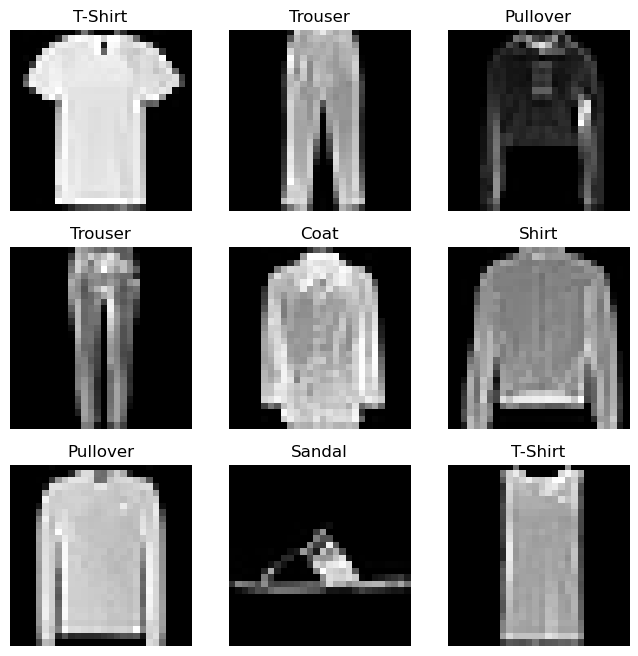

In [24]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Prepare for training


In [25]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


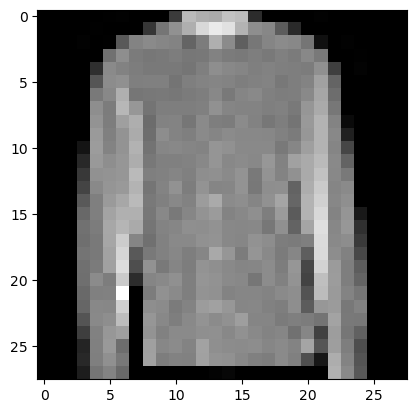

Label: 6


In [26]:
train_features, train_labels = next(iter(train_data_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Transformations
One issue we can see from the above is that the samples are not of the same size. Most neural networks expect the images of a fixed size. Therefore, we will need to write some prepocessing code. Let’s create three transforms:
- Rescale: to scale the image
- RandomCrop: to crop from image randomly. This is data augmentation.
- ToTensor: to convert the numpy images to torch images (we need to swap axes).



In [27]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

## Build NN
- nn.Module: Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.

`nn.Linear` applies linear transformation to the incoming data: $y = xA^T + b$

`nn.ReLU` applies the rectified linear unit function element-wise: $ReLU(x) = max(0, x)$

`nn.Sequential` is a sequential container. Modules will be added to it in the order they are passed in the constructor. Alternatively, an ordered dict of modules can also be passed in.

In [33]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [41]:
# Flatten
input = torch.randn(32,1,5,5)
print(input.shape)
m = nn.Flatten()
output = m(input)
print(output.shape)

torch.Size([32, 1, 5, 5])
torch.Size([32, 25])


In [42]:
# Linear
m = nn.Linear(20, 30) # 20 input features, 30 output features
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


In [44]:
m = nn.Linear(2, 3)
input = torch.randn(12, 2)
output = m(input)
print(input)
print(output)
print(m.weight)

tensor([[-0.8423,  0.4346],
        [-0.6993,  0.5407],
        [-0.7828,  1.1298],
        [ 2.5250, -0.7516],
        [-0.2569,  0.1466],
        [ 0.7092,  0.4504],
        [ 0.1273,  1.1813],
        [ 0.9336, -0.2399],
        [-0.0712,  1.4887],
        [-0.1177,  0.5489],
        [ 0.2247,  1.0378],
        [-1.3864,  0.6958]])
tensor([[-0.5460,  0.8249,  0.8449],
        [-0.5363,  0.7662,  0.8260],
        [-0.7921,  0.9274,  0.9491],
        [ 1.0967, -1.2756, -0.2357],
        [-0.2290,  0.4438,  0.6430],
        [-0.0052, -0.0332,  0.4438],
        [-0.4912,  0.4323,  0.7211],
        [ 0.3392, -0.2924,  0.2666],
        [-0.6793,  0.6025,  0.8257],
        [-0.3345,  0.4450,  0.6760],
        [-0.4017,  0.3502,  0.6711],
        [-0.8381,  1.1779,  1.0315]], grad_fn=<AddmmBackward0>)
Parameter containing:
tensor([[ 0.3525, -0.3843],
        [-0.5551,  0.1950],
        [-0.2603,  0.1722]], requires_grad=True)


In [47]:
m = nn.ReLU()
input = torch.randn(2)
output = m(input)
print(output)

tensor([0.0000, 1.5364])


In [34]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print('Using {} device'.format(device))

Using mps device


In [49]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # flatten dims into tensor
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[ 0.0262,  0.0055, -0.0108,  ..., -0.0211, -0.0132, -0.0129],
        [-0.0259,  0.0008, -0.0138,  ..., -0.0140, -0.0061, -0.0224]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([ 0.0315, -0.0151], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0328, -0.0123, -0.0351,  ..., -0.0417, -0.0304,  0.0279],
        [ 0.0371,  0.0420, -0.0157,  ..., -0.0204,  0.0201,  0.0011]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: l

## Autograd (Automatic Differentiation)
- The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

In [50]:
import torch
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

# Optimizing model parameters
- The first thing to learn about neural networks is that they are just a series of nested functions that take some input data and produce some output data. The goal of training a neural network is to find the parameters (weights and biases) of these functions that minimize the error between the output of the network and the true output of the data. This is done by computing the gradient of the error with respect to the parameters and updating the parameters in the direction of the gradient. This is called gradient descent.

- Number of Epochs: This is the number of times the entire training dataset is passed forward and backward through the neural network.
- Batch size - the number of data samples
- Learning rate - how fast the model learns

- The gradient descent algorithm is as follows:
    - Initialize the parameters of the model randomly
    - Feed inputs through the model to get the predictions
    - Compute the loss (how far is the predicted output from the true output)
    - Compute the gradient of the loss with respect to the parameters of the model
    - Update the parameters of the model in the direction of the gradient
    - Repeat steps 2-5 until the model performs well

## Optimization Loop

- We have defined our model and data. Now we are ready to train, that is, optimize the model using our data. The steps in this process are as follows:
    - Generate predictions
    - Calculate the loss
    - Compute gradients w.r.t the weights and biases
    - Adjust the weights by subtracting a small quantity proportional to the gradient
    - Reset the gradients to zero


- Train loop
- Validation/test loop

## Loss function
- A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.
- There are several different loss functions under the nn package . A simple loss is: nn.MSELoss which computes the mean-squared error between the input and the target.
```python
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
```

## Optimizer
- Optimizer is an important component of the training process. It is the entity that updates the weights of the neural network. There are several different optimizers under the torch.optim package. We will use the SGD optimizer in this tutorial.
```python
# Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
```


In [52]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch+1) * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    # Set model to evaluation mode
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_data_loader, model, loss_fn, optimizer)
    test_loop(test_data_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.293691 [   64/60000]
loss: 2.281288 [ 6464/60000]
loss: 2.258447 [12864/60000]
loss: 2.248502 [19264/60000]
loss: 2.242290 [25664/60000]
loss: 2.220348 [32064/60000]
loss: 2.192414 [38464/60000]
loss: 2.196821 [44864/60000]
loss: 2.163811 [51264/60000]
loss: 2.139488 [57664/60000]
Test Error: 
 Accuracy: 0.0%, Avg loss: 2.136418 

Epoch 2
-------------------------------
loss: 2.114639 [   64/60000]
loss: 2.099608 [ 6464/60000]
loss: 2.089248 [12864/60000]
loss: 2.048249 [19264/60000]
loss: 1.983430 [25664/60000]
loss: 2.021283 [32064/60000]
loss: 1.958422 [38464/60000]
loss: 1.929212 [44864/60000]
loss: 1.927512 [51264/60000]
loss: 1.905471 [57664/60000]
Test Error: 
 Accuracy: 0.0%, Avg loss: 1.845497 

Epoch 3
-------------------------------
loss: 1.842993 [   64/60000]
loss: 1.805009 [ 6464/60000]
loss: 1.787614 [12864/60000]
loss: 1.753417 [19264/60000]
loss: 1.647670 [25664/60000]
loss: 1.627174 [32064/60000]
loss: 1.574552 [38464/60